# Multilinear Regression Model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(5, 4)})
sns.set(font_scale=1.5) 

### Part 1: Data Cleaning & Exploration

1. The `world_happiness.xlsx` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Let's start loading and saving the dataset to a DataFrame object named `happy` and let's familiarise with its contents:

In [2]:
happy = pd.read_excel('data/world_happiness.xlsx')

happy.info()

happy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


2. Let's use histogram to plot the distribution of the `happiness_score` variable, and to answer this question: **which distribution does it resemble?**

In [3]:
# Before plotting a histogram, let's explore our data:

happy_score = happy['happiness_score']

total_values = len(happy_score)
distinct_values = len(happy_score.unique())
min_value = happy_score.min()
max_value = happy_score.max()

print(f'number of total value: {total_values}')
print(f'number of distinct value: {distinct_values}')
print(f'min value: {min_value}')
print(f'max value: {max_value}')
print('')

bin_fill_percentage = total_values/((max_value-(min_value)+1))*100
print(f'Avg. bin filling percentage: {bin_fill_percentage:.0f}%')

number of total value: 143
number of distinct value: 143
min value: 0
max value: 155

Avg. bin filling percentage: 92%


Avg. bin filling percentage: 92%



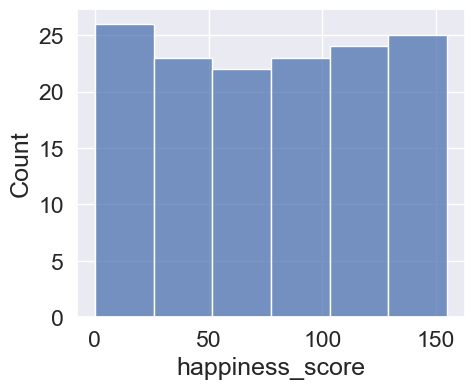

In [4]:
# Since there are 143 integer values, all distinct, in a range from 0 to 155
# (so 143 distinct values in a range of 156 possible slots),
# We can already assume that the distribution is uniform, with all bins "almost entirely filled".
# (I expressed this concept numerically using the bin_fill_percentage parameter)

# Let's check it via histogram:

print(f'Avg. bin filling percentage: {bin_fill_percentage:.0f}%')
print('')
sns.histplot(data=happy, x='happiness_score', bins=6)
plt.show()

In [5]:
# As assumed, the distribution is uniform

3. Let's now plot a correlation matrix between all the numeric variables in the dataset and let's answer to this question: **which variable is the least correlated with the `happiness_score` metric?** 

In [6]:
# Let's visualize the correlation matrix:

correlation = happy.corr()
correlation

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


In [7]:
# Q3 - Version 1

# I write the matrix containing the absolute values of the correlation matrix:
abs_val_correlation = correlation.abs()
abs_val_correlation

# Let's extract the variable for which the correlation is minimum (in absolute value):
least_corr_variable = abs_val_correlation['happiness_score'].sort_values(ascending=True).index[0]

# I extract the correlation value corresponding to the variable for which the correlation is 
# minimal in absolute value:
least_corr_value = correlation['happiness_score'].loc[least_corr_variable]

# Let's print the results:
print(f'Variable least correlated: {least_corr_variable}')
print(f'Correlation value: {least_corr_value:.4f}')

Variable least correlated: corruption
Correlation value: -0.2153


In [8]:
# Q3 - Version 2

# I find the minimum correlation value (in absolute value) for happiness_score:
min_happy_corr = abs_val_correlation['happiness_score'].min()

# Let's select the row of the DataFrame for which the happiness_score value is equal to
# the minimum value found in the previous row. After doing this I obtain the row index:
least_corr_variable = abs_val_correlation[abs_val_correlation['happiness_score']==min_happy_corr].\
index.to_list()[0]

# I select the correlation value for the least correlated variable:
least_corr_value = correlation['happiness_score'].loc[least_corr_variable]

# Let's print the results:
print(f'Variable least correlated: {least_corr_variable}')
print(f'Correlation value: {least_corr_value:.4f}')

Variable least correlated: corruption
Correlation value: -0.2153


4. As we noticed in `Point 1` of our analysis by using the method `.describe()` on dataset `happy`, `corruption` metric has some missing values. Two questions: **how many countries have a missing corruption value?** And **which are these countries?**

In [9]:
# Q4 - Part 1

nan_corruption = len(happy[pd.isna(happy['corruption'])])
# nan_corruption = len(happy[happy['corruption'].isna() == True]['country'])

print(f'Number of countries with missing value for corruption: {nan_corruption}')

Number of countries with missing value for corruption: 8


In [10]:
# Q4 - Part 2

happy[pd.isna(happy['corruption'])]['country']

# or:
# happy[happy['corruption'].isna() == True]['country']

20    United Arab Emirates
26            Saudi Arabia
27                   Qatar
35                 Bahrain
47                  Kuwait
78            Turkmenistan
84                   China
91                  Jordan
Name: country, dtype: object

5. Let's now replace all missing values in all columns of the DataFrame. Considering the type of our data, we decide to replace the missing values with the respective column's mean value:

In [11]:
# Let's extract all distinct dtypes from the DataFrame Happy:

happy_dtypes = []
for el in happy.columns:
    happy_dtypes.append(happy[el].dtype.kind)
    
happy_dtypes = list(set(happy_dtypes))
happy_dtypes

['i', 'f', 'O']

In [12]:
# Let's replace all the missing values via a for loop on all columns of numeric type:

for el in happy.columns:
    if happy[el].dtype.kind!='O':
        happy[el].fillna(happy[el].mean(), inplace=True)

In [13]:
# Let's verify that the imputation of the average values has been successful:

happy.info()
happy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   143 non-null    float64
 2   freedom          143 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       143 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,77.352113,77.00000,73.244444,78.781690,20124.286713,73.796503,77.643357
std,45.582026,45.40832,41.030471,44.720905,20570.547556,7.092194,46.377418
min,1.000000,1.00000,1.000000,1.000000,631.000000,52.900000,0.000000
25%,37.500000,38.00000,39.500000,41.500000,4110.000000,69.100000,36.500000
50%,77.000000,76.00000,73.244444,80.000000,13000.000000,74.900000,79.000000
75%,116.500000,116.50000,107.500000,116.500000,29750.000000,79.650000,118.000000
max,155.000000,155.00000,148.000000,155.000000,113000.000000,85.100000,155.000000


In [14]:
# Now value on count row is 143 for all columns (as expected) and on the quartiles rows vales have changed; 
# Mean row values have not changed, as expected from an imputation of mean values.

In [15]:
# Let's take the opportunity to define a more general function that allows us to replace the missing 
# values of a DataFrame with the average values of the related columns in all columns of type float or int:
    
def fillna_with_mean(df):
    for el in df.columns:
        if df[el].dtype.kind=='f' or df[el].dtype.kind=='i':
            df[el].fillna(df[el].mean(), inplace=True)
    return df

In [16]:
# Let's test our function:

my_dict = {'A': [np.NaN, 1, 2, 0], 
           'B': [2.5, 2.5, 2.5, np.NaN], 
           'C': ['one', 'one', 'two', np.NaN]}

df_test = pd.DataFrame.from_dict(my_dict)

fillna_with_mean(df_test)

,A,B,C
0,1.0,2.5,one
1,1.0,2.5,one
2,2.0,2.5,two
3,0.0,2.5,NaN


### Part 2: Linear Regression Model

6. Let's now use `statsmodel` to create a linear regression model. Let's start with a model in one single variable, where we use `life_exp` variable to predict `happiness_score`. Let's then try to answer this question: given the model we will create, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**

In [17]:
# Q6 - Part 1

import statsmodels.api as sm

Y = happy['happiness_score']    # endogenous variable
X = happy['life_exp']           # exogenous variable
X = sm.add_constant(data=X)     # add a constant to the model
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.59e-30
Time:                        22:16:49   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Q6 - Part 2

# Let's extract angular coefficient of our model:
b1 = pd.DataFrame(results.summary().tables[1])[1].iloc[2]
b1 = str(b1).strip()
print(f'Incremento happiness score: {b1}')

# To answer our question: increase is given by the slope of our model, i.e. by its angular coefficient (b1 = 5.1021)

# In fact, to see how much y increases by increasing x by one point, we should use the equation: Δy = b1 * Δx e porre Δx = 1. 
# In details:

# Δy = y2 - y1
# Δy = (b1 * x2 + b0) - (b1 * x1 + b0)
# Δy = b1 * x2 + b0 - b1 * x1 - b0
# Δy = b1 * x2 - b1 * x1 + b0 - b0
# Δy = b1 * (x2 - x1) + 0
# Δy = b1 * Δx
# and setting Δx = 1 we obtain:
# Δy = b1

# This is because the geometric meaning of the coefficient b1 is just the change in y as x increases by one point.

Incremento happiness score: 5.1021


### Part 3: Multiple Linear Regression Model

7. Let's now split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, we will train a linear regression model where we try to predict the `happiness_score` using the following set of predictors (chosen a priori): `['social_support', 'freedom', 'generosity', 'life_exp']` *(Let's use a `random_state=42` parameter to fix our results)*. Let's then calculate the R-squared on the train set and compare it with the R-squared based on the test set. So let's answer the question: **is the model overfitting the training data?**

In [19]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:

Y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(data=X)

In [21]:
# Let's split the dataset into train and test:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [22]:
# Q7 - Version 1 (by scikit-learn)

# Let's apply linear regression to the training data:
reg = LinearRegression().fit(X_train,Y_train) 

# Let's predict Y values for training data via our trained model:
Y_test_pred = reg.predict(X_test)
Y_train_pred = reg.predict(X_train)

# Let's calculate the R2 for the Y_train training data compared to the predictions estimated by the model:
r2_train = r2_score(Y_train,Y_train_pred)

# Let's calculate the R2 for the Y_test values compared to the predictions Y_pred estimated by the model starting from X_test
r2_test = r2_score(Y_test,Y_test_pred)

# Let's print the results:
print(f'R2 value for train data: {r2_train:.6f}')
print(f'R2 value for test data: {r2_test:.6f}')

## reg.intercept_, reg.coef_

R2 value for train data: 0.784887
R2 value for test data: 0.777237


In [23]:
# Q7 - Version 2 (by statsmodels)

# Let's apply linear regression to the training data:
model = sm.OLS(Y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           3.39e-29
Time:                        22:16:49   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Let's predict the results for the training data:
pred_train = results.predict(X_train)

# As an exercise and just to verify that everything is working, let's manually calculate the R-squared value 
# for the train data and verify that it has the same R-squared value found in the model summary:
ssr_train = np.sum((Y_train - pred_train)**2)
sst_train = np.sum((Y_train - np.mean(Y_train))**2)
rsq_train = 1 - (ssr_train/sst_train)
print('R-squared of train set:', round(rsq_train, 6))


# Let's predict test data results, not known by the model:
pred_test = results.predict(X_test)

# Let's calculate the R2 that the real values of Y_test have with respect 
# to the pred_test predictions that the model made starting from X_test:
ssr_test = np.sum((Y_test - pred_test)**2)

sst_test = np.sum((Y_test - np.mean(Y_test))**2)
rsq_test = 1 - (ssr_test/sst_test)
print('R-squared of test set:', round(rsq_test, 6))

R-squared of train set: 0.784887
R-squared of test set: 0.777237


In [25]:
# Results match sklearn results, so it's ok

In [26]:
# CONCLUSION: 
#    since the R-squared of the test data (not known by the model) is very similar to the R-squared of the 
#    data used for training (and therefore known by the model), we can say that the model 
#    predicts the test data as accurately as estimate the data used for training.
#    It can therefore be concluded that there is no overfitting.

#    Also, it makes sense that the R-squared of the test data is slightly lower than the R-squared of the
#    of the training data (0.777 versus 0.785) because this is still data that the model does 
#    not know about and has not been trained on (predictions vs estimates).

8. Using our model, let's now calculate the MAE on the testing set and report and let's answer the question: **is our model's performance satisfying?**

In [27]:
# Mean Absolute Error (MAE)
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

# Mean Absolute Percentage Error (MAPE)
def mape(y, pred): 
    return round(np.mean(np.abs((y - pred)/y))*100, 2)

In [28]:
# Let's calculate the MAE for the train and test data. To get an idea of their size, let's compare them
# with the MAE values that the data would have compared to a naïve model, which simply predicts the 
# average of the dataset values:

print('Naïve Training MAE:', mae(Y_train, np.mean(Y_train))) #naive mae
print('Training MAE:', mae(Y_train, pred_train)) # mae
print('')
print('Naïve Testing MAE:', mae(Y_test, np.mean(Y_test))) #naive mae
print('Testing MAE:', mae(Y_test, pred_test)) # mae

Naïve Training MAE: 40.38
Training MAE: 16.92

Naïve Testing MAE: 39.94
Testing MAE: 17.54


In [29]:
# Since MAE values for the training and test data are similar, I have another confirmation that
# the model does not have overfitting issues.


# CONCLUSION:
#    Considering that the happiness_score values are uniformly distributed from 0 to 155 and that the Testing MAE 
#    has a value of 17, there will be a large portion of data (the largest values) for which the MAE weighs little
#    and for which the prediction will be more accurate; but there will be an equally large portion of data (the 
#    smallest values) for which prediction may deviate greatly from the real values. In general, therefore, the model 
#    appears to be unsatisfying.

# To further confirm this, let's calculate MAPE for the test set:

In [30]:
print(f'Testing MAPE: {mape(Y_test, pred_test)}%')
print(f'Testing MAPE: {mape(Y_test, Y_test_pred)}%')

Testing MAPE: 38.63%
Testing MAPE: 38.63%


In [31]:
# Since MAPE has a value of 38%, we can conclude that the model is unsatisfactory.

# In addition, we can also notice that it is quite weird to find a negative relationship between the 
# happiness score and the variables social support, freedom and generosity:

happy.corr()['happiness_score'][:-1]

social_support   -0.821384
freedom          -0.565298
corruption       -0.211122
generosity       -0.497250
gdp_per_cap       0.727973
life_exp          0.780225
Name: happiness_score, dtype: float64

9. Since our model is unsatisfying, let's answer to the question: **is it possible to improve our previous model?**


In [32]:
# Q9

# First of all, let's look back to our model; in particular let's look to his coefficients, p-values 
# and to the values of the correlation matrix:

results.summary().tables[0]

Dep. Variable:,happiness_score,R-squared:,0.785
Model:,OLS,Adj. R-squared:,0.775
Method:,Least Squares,F-statistic:,82.10
Date:,"Sun, 05 Mar 2023",Prob (F-statistic):,3.39e-29
Time:,22:16:50,Log-Likelihood:,-426.46
No. Observations:,95,AIC:,862.9
Df Residuals:,90,BIC:,875.7
Df Model:,4,,
Covariance Type:,nonrobust,,


In [33]:
# Let's look at p-values to check the significance of the variables:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.3763,38.767,0.036,0.972,-75.642,78.395
social_support,-0.5119,0.073,-7.025,0.000,-0.657,-0.367
freedom,-0.1786,0.060,-2.966,0.004,-0.298,-0.059
generosity,-0.0518,0.061,-0.847,0.399,-0.173,0.070
life_exp,1.8109,0.459,3.942,0.000,0.898,2.724


In [34]:
# Let's look at the correlation between the variables:
happy.corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.153112,0.449225,-0.635651,-0.703274,-0.821384
freedom,0.470893,1.000000,0.379438,0.493207,-0.411042,-0.387622,-0.565298
corruption,0.153112,0.379438,1.000000,0.296768,-0.292755,-0.133278,-0.211122
generosity,0.449225,0.493207,0.296768,1.000000,-0.491708,-0.431770,-0.497250
gdp_per_cap,-0.635651,-0.411042,-0.292755,-0.491708,1.000000,0.701955,0.727973
life_exp,-0.703274,-0.387622,-0.133278,-0.431770,0.701955,1.000000,0.780225
happiness_score,-0.821384,-0.565298,-0.211122,-0.497250,0.727973,0.780225,1.000000


In [35]:
# As we caqn see from the summary, "generosity" has a not significant p-value and a high correlation 
# with the other variables, so I choose to exclude it from the model.

# I also choose to add the "gdp_per_cap" variable among the Xs, which has a high correlation with the dependent
# variable; Also, I intuitively expect "gdp_per_cap" to be a significant variable for determining the happiness score. So:

In [36]:
Y_new = happy['happiness_score']
X_new = happy[['social_support', 'freedom', 'gdp_per_cap', 'life_exp']]
X_new = sm.add_constant(data=X_new)

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.33, random_state=42)

# Let's apply linear regression to the training data:
model_new = sm.OLS(Y_train_new,X_train_new)
results_new = model_new.fit()
## results.summary().tables[0]
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     87.93
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.99e-30
Time:                        22:16:50   Log-Likelihood:                -423.88
No. Observations:                  95   AIC:                             857.8
Df Residuals:                      90   BIC:                             870.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.6797     38.750      0.585      0.560     -54.304      99.664
social_support    -0.4672      0.074     -6.343      0.000      -0.613      -0.321
freedom           -0.1759      0.055     -3.199      0.002      -0.285      -0.067
gdp_per_cap        0.0004      0.000      2.403      0.018     7.2e-05       0.001
life_exp           1.3013      0.501      2.596      0.011       0.305       2.297
==============================================================================
Omnibus:                        1.700   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.168
Skew:                           0.089   Prob(JB):                        0.558
Kurtosis:                       3.513   Cond. No.                     4.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
results_new.summary().tables[0]

Dep. Variable:,happiness_score,R-squared:,0.796
Model:,OLS,Adj. R-squared:,0.787
Method:,Least Squares,F-statistic:,87.93
Date:,"Sun, 05 Mar 2023",Prob (F-statistic):,2.99e-30
Time:,22:16:50,Log-Likelihood:,-423.88
No. Observations:,95,AIC:,857.8
Df Residuals:,90,BIC:,870.5
Df Model:,4,,
Covariance Type:,nonrobust,,


In [38]:
# Let's compare the train and test R2s of the two models:

R2_new = str(results_new.summary().tables[0][0][3]).strip()
R2_old = str(results.summary().tables[0][0][3]).strip()

print(f'R-squared of train set with new model: {R2_new}')
print(f'R-squared of train set with old model: {R2_old}')
print('')

# Let's predict the results for test data, not known by the model:
pred_test_new = results_new.predict(X_test_new)

# Let's calculate the R2 for the new model's train and test data and compare it to the previous model:
ssr_test_new = np.sum((Y_test_new - pred_test_new)**2)
sst_test_new = np.sum((Y_test_new - np.mean(Y_test_new))**2)
rsq_test_new = 1 - (ssr_test_new/sst_test_new)
print('R-squared of test set with new model:', round(rsq_test_new, 3))
print('R-squared of test set with old model:', round(rsq_test, 3))

R-squared of train set with new model: 0.796
R-squared of train set with old model: 0.785

R-squared of test set with new model: 0.801
R-squared of test set with old model: 0.777


In [39]:
# Alternatively, we can calculate R2 values by scikit-learn. Let's do it to make a check:

reg_new = LinearRegression().fit(X_train_new,Y_train_new) 

Y_train_pred_new = reg_new.predict(X_train_new)
Y_test_pred_new = reg_new.predict(X_test_new)

r2_train_new = r2_score(Y_train_new,Y_train_pred_new)
r2_test_new = r2_score(Y_test_new,Y_test_pred_new)

# Stampo il risultato:
print(f'R-squared of train set with new model: {r2_train_new:.3f}')
print(f'R-squared of train set with old model: {r2_train:.3f}')
print('')
print(f'R-squared of test set with new model: {r2_test_new:.3f}')
print(f'R-squared of test set with old model: {r2_test:.3f}')

R-squared of train set with new model: 0.796
R-squared of train set with old model: 0.785

R-squared of test set with new model: 0.801
R-squared of test set with old model: 0.777


In [40]:
# Let's print MAE and MAPE results:

print('Training MAE with new model:', mae(Y_train_new, Y_train_pred_new))
print('Training MAE with old model:', mae(Y_train, Y_train_pred))
print('')
print('Testing MAE with new model:', mae(Y_test_new, Y_test_pred_new))
print('Testing MAE with old model:', mae(Y_test, Y_test_pred))
print('')
print(f'Testing MAPE with new model: {mape(Y_test_new, Y_test_pred_new)}%')
print(f'Testing MAPE with old model: {mape(Y_test, Y_test_pred)}%')

Training MAE with new model: 16.22
Training MAE with old model: 16.92

Testing MAE with new model: 16.79
Testing MAE with old model: 17.54

Testing MAPE with new model: 36.18%
Testing MAPE with old model: 38.63%


In [41]:
# CONCLUSION

# Our new model has the following features:
#    A better R-squared value than the previous model
#    A better R-squared value calculated on test set data than the previous model
#    Similar R-squared values between training data and test data
#    Slightly better MAE and MAPE values than the previous model

# We can therefore conclude that the new model has a better predictive power than the previous model 
# and, like the previous model, it has no overfitting problems.

# We can also notice that in the new model, unlike the previous one, all the coefficients of the 
# variables used are significant.

# Last note to make: we didn't solve the problem of multicollinearity. In fact, we made it worse.  
# Anyway, the combination of variables that we have chosen for the Xs is the best compromise 
# among all those possible to predict the data.
# We can conclude that Linear regression is not the best model for describing the trend of these data.